In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')

In [2]:
from psikit import Psikit

In [3]:
pk=Psikit(debug=True,threads=1,memory=12)


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.


In [4]:
pk.read_from_smiles('Cn1cnc2n(C)c(=O)n(C)c(=O)c12')

In [5]:
pk.optimize()

Optimizer: Optimization complete!


-676.357117214437

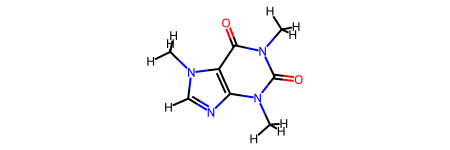

In [6]:
pk.mol

In [7]:
#calculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.21508045  0.03530487  0.10365286 -0.48563292  0.16991768 -0.02699942
 -0.03174697  0.43356841 -0.54032048 -0.09297648 -0.05739973  0.39010099
 -0.50164621 -0.0902054   0.11560783  0.11560783  0.11560783  0.1725693
  0.06100678  0.06100678  0.06100678  0.0690167   0.0690167   0.0690167 ]
[-0.11403437 -0.69385945  0.38637433 -0.62282343  0.63500916 -0.87750291
 -0.12043176  1.09567451 -0.62723989 -0.87906639 -0.12346628  0.89980689
 -0.63013607  0.09325151  0.12972852  0.16725246  0.16730119  0.18241201
  0.16748623  0.14951623  0.14835838  0.14542519  0.14581107  0.17515288]
[-0.13411111 -0.05232058  0.07469617 -0.27506827  0.13916037 -0.15205403
 -0.13174931  0.3474901  -0.39843157 -0.1896997  -0.13733456  0.29723834
 -0.39588858 -0.12536484  0.10536904  0.1161942   0.1195124   0.12334094
  0.11902098  0.1077806   0.10743047  0.10646337  0.10580955  0.12251601]


In [8]:
mol = pk.mol
atoms = mol.GetAtoms()

In [9]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [10]:
df = pd.DataFrame(data)

In [11]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.215,-0.114,-0.134
1,N,0.035,-0.694,-0.052
2,C,0.104,0.386,0.075
3,N,-0.486,-0.623,-0.275
4,C,0.170,0.635,0.139
5,N,-0.027,-0.878,-0.152
6,C,-0.032,-0.120,-0.132
7,C,0.434,1.096,0.347
8,O,-0.540,-0.627,-0.398
9,N,-0.093,-0.879,-0.190


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
plt.style.use('ggplot')

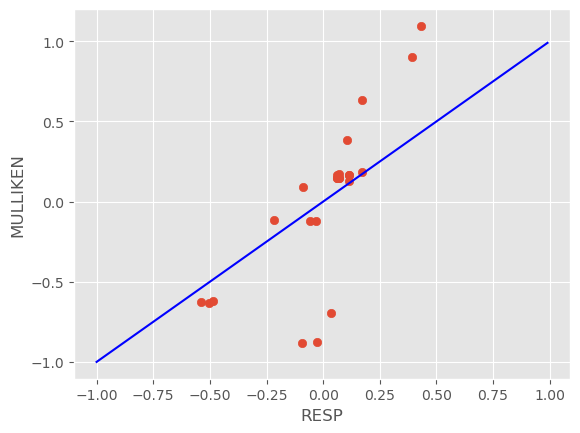

In [14]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

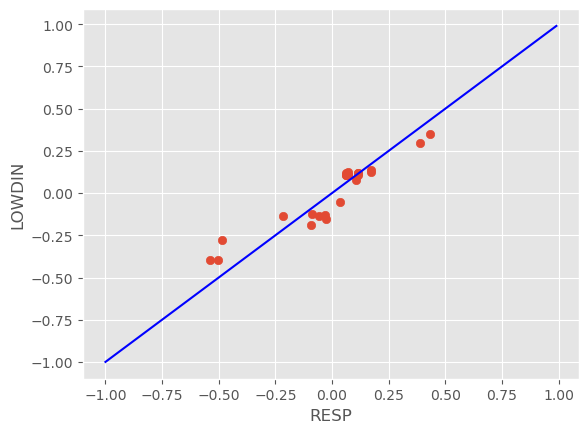

In [15]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

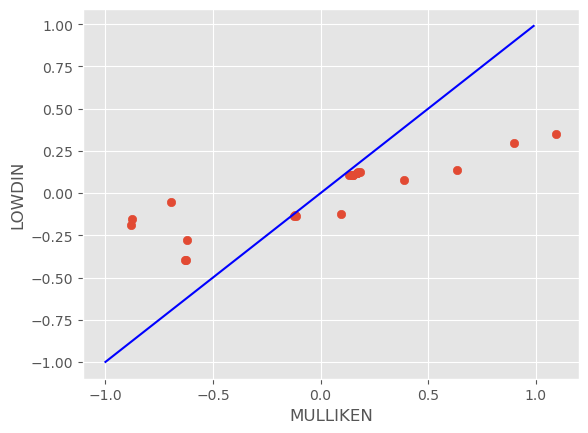

In [16]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')